In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

import pytorch_lightning as pl
import importlib

base_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_augmentation = transforms.Compose(
    [*base_transform.transforms,
     transforms.RandomResizedCrop((32, 32), scale=(0.9, 1.0), ratio=(0.9, 1.1)),
     transforms.RandomHorizontalFlip()]
)


batch_size = 200

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=base_transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=base_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2, pin_memory=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2, pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

In [6]:
import model
importlib.reload(model)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    check_finite=True
)
logger = TensorBoardLogger('tb_logs', name='resv2', log_graph=True, default_hp_metric=True)

cnn_model = model.ResV2Cifar10([2, 2, 2, 2], in_channels=32)
trainer = pl.Trainer(gpus=1, callbacks=[early_stopping], logger=logger, precision=16)
trainer.fit(cnn_model, trainloader, testloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\utilities\distributed.py:69: UserWarning: Could not log computational graph since the `model.example_input_array` attribute is not set or `input_array` was not given
  warnings.warn(*args, **kwargs)

  | Name       | Type       | Params
------------------------------------------
0 | conv1      | Sequential | 928   
1 | l1         | Sequential | 37.1 K
2 | l2         | Sequential | 131 K 
3 | l3         | Sequential | 525 K 
4 | l4         | Sequential | 2.1 M 
5 | projection | Sequential | 68.4 K
6 | dropout    | Dropout2d  | 0     
------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.454    Total estimated model params size (MB)


C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\utilities\distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\utilities\distributed.py:69: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  wa

C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\utilities\distributed.py:69: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


In [3]:

import model
importlib.reload(model)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    check_finite=True
)
logger = TensorBoardLogger('tb_logs', name='mlp', log_graph=True, default_hp_metric=True)

mlp_model = model.MLPCifar10(16*16, 4, 0.2)
trainer = pl.Trainer(gpus=1, callbacks=[early_stopping], logger=logger, precision=16)
trainer.fit(mlp_model, trainloader, testloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type       | Params | In sizes  | Out sizes
------------------------------------------------------------
0 | fc_1 | Sequential | 787 K  | [1, 3072] | [1, 256] 
1 | fc_h | ModuleList | 265 K  | ?         | ?        
2 | fc_o | Sequential | 2.6 K  | [1, 256]  | [1, 10]  
------------------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.220     Total estimated model params size (MB)


C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\utilities\distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\utilities\distributed.py:69: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


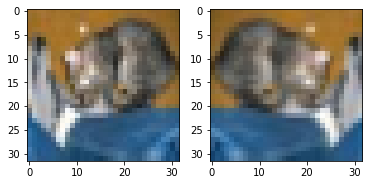

In [123]:
from PIL import Image
import matplotlib.pyplot as plt

test_augmentations = transforms.Compose(
    [transforms.RandomResizedCrop((32, 32), scale=(0.9, 1.0), ratio=(0.9, 1.1)),
     transforms.RandomHorizontalFlip()]
)

img = Image.fromarray(testset.data[0])
im2 = test_augmentations(img)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(im2)

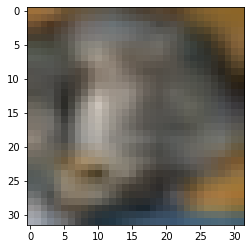